<a href="https://colab.research.google.com/github/charlie-aashutosh/charlie/blob/master/export_import_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from google.colab import files
files=files.upload()

Saving monthly_data_total.xlsx to monthly_data_total.xlsx


In [0]:

df=pd.read_excel("monthly_data_total.xlsx")

In [16]:
df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [17]:
df.describe()

,Import,Export
count,165.000000,165.000000
mean,32172.849333,21185.384848
std,9151.546169,5976.205557
min,11479.690000,8624.660000
25%,25868.920000,15757.360000
50%,33772.550000,23012.240000
75%,39966.570000,25949.040000
max,46618.800000,32717.300000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    165 non-null    datetime64[ns]
 1   Import  165 non-null    float64       
 2   Export  165 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.0 KB


In [0]:
df.set_index('Date', inplace=True)

In [20]:




df.head()

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30


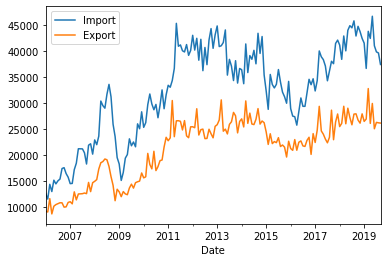

In [21]:
#visualizing the data
df.plot()

In [0]:
#testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [0]:
test_result=adfuller(df['Export'])

In [0]:
#hypothesis testing
#H0 is non-stationary and H1 is stationary

def adfuller_test(export):
  result=adfuller(export)
  labels=['ADF Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used']
  for value, label in zip(result, labels):
    print(label+':'+str(value))
  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis H0")
  else:
    print("weak evidence against null hypothesis H0")
        

In [25]:
adfuller_test(df['Export'])


ADF Test Statistics:-1.9961003848278347
p-value:0.2882855578507899
#Lags Used:12
Number of Observations Used:152
weak evidence against null hypothesis H0


In [0]:
#applying Differencing

df['Export First Difference']=df['Export']-df['Export'].shift(1)

In [27]:
df['Export'].shift(1)

Date
2006-01-01         NaN
2006-02-01     9143.66
2006-03-01     8993.29
2006-04-01    11560.97
2006-05-01     8624.66
                ...   
2019-05-01    26023.18
2019-06-01    29854.24
2019-07-01    24990.77
2019-08-01    26217.50
2019-09-01    26133.50
Name: Export, Length: 165, dtype: float64

In [0]:
df['Seasonal First Difference']=df['Export']-df['Export'].shift(12)

In [29]:
df.head(14)

,Import,Export,Export First Difference,Seasonal First Difference
Date,,,,
2006-01-01,12519.71,9143.66,NaN,NaN
2006-02-01,11479.69,8993.29,-150.37,NaN
2006-03-01,14314.02,11560.97,2567.68,NaN
2006-04-01,12924.18,8624.66,-2936.31,NaN
2006-05-01,15105.67,10109.30,1484.64,NaN
2006-06-01,14399.73,10419.60,310.30,NaN
2006-07-01,14985.01,10599.73,180.13,NaN
2006-08-01,15326.36,10769.09,169.36,NaN
2006-09-01,17350.69,10756.49,-12.60,NaN


In [30]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistics:-2.6136095023077552
p-value:0.09021695655518752
#Lags Used:12
Number of Observations Used:140
weak evidence against null hypothesis H0


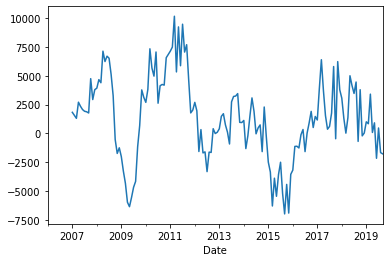

In [31]:
df['Seasonal First Difference'].plot()

In [0]:
#implementing ARIMA
from pandas.plotting import autocorrelation_plot

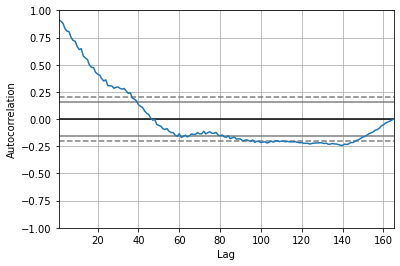

In [33]:
autocorrelation_plot(df['Export'])
plt.show()

In [0]:
import statsmodels.api as sm

In [0]:
from statsmodels.graphics import tsaplots 

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

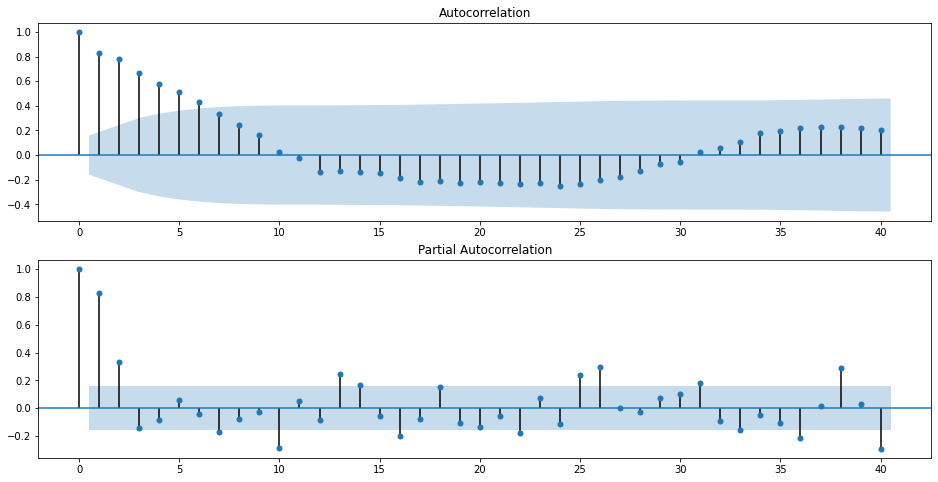

In [37]:
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [0]:
#if we had non seasonal data
#p=1, d=1 and q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [39]:
model=ARIMA(df['Export'], order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Export   No. Observations:                  164
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1470.362
Method:                       css-mle   S.D. of innovations           1892.197
Date:                Sun, 19 Apr 2020   AIC                           2948.724
Time:                        17:01:54   BIC                           2961.124
Sample:                    02-01-2006   HQIC                          2953.758
                         - 09-01-2019                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            103.3071     76.897      1.343      0.181     -47.408     254.022
ar.L1.D.Export    -0.2943      0.122     -2.409      0.017      -0.534      -0.055
ma.L1.D.Export    -0.3294      0.117     -2.817      0.005      -0.559      -0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3980           +0.0000j            3.3980            0.5000
MA.1            3.0361           +0.0000j            3.0361            0.0000
-----------------------------------------------------------------------------
"""

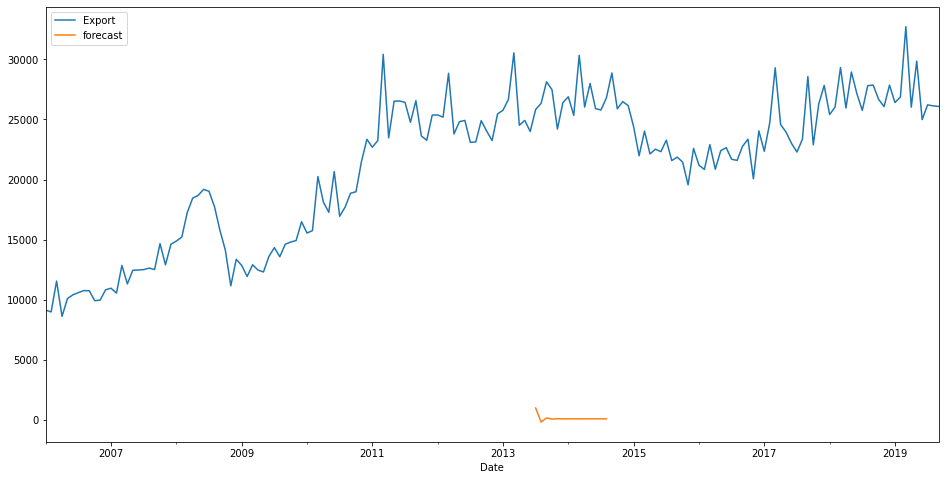

In [41]:
df['forecast']=model_fit.predict(start=90, end=103, dynamic=True)
df[['Export','forecast']].plot(figsize=(16,8))

In [0]:
import statsmodels.api as sm

In [43]:
model=sm.tsa.statespace.SARIMAX(df['Export'], order=(1,1,1), seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


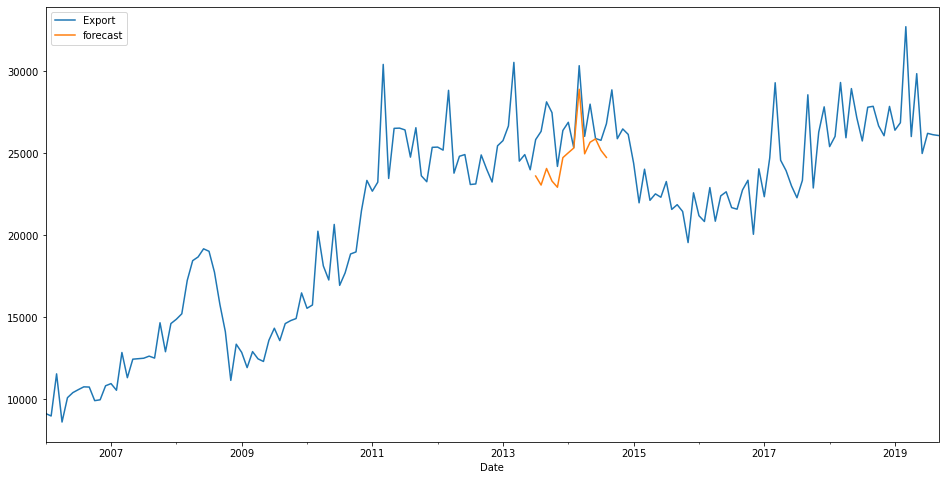

In [44]:
df['forecast']=results.predict(start=90, end=103, dynamic=True)
df[['Export', 'forecast']].plot(figsize=(16,8))

In [0]:
#forecasting for next month

In [0]:
from pandas.tseries.offsets import DateOffset

In [0]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,1)]


In [0]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [49]:
future_dates_df.tail()

,Import,Export,Export First Difference,Seasonal First Difference,forecast


In [0]:
future_df=pd.concat([df, future_dates_df])


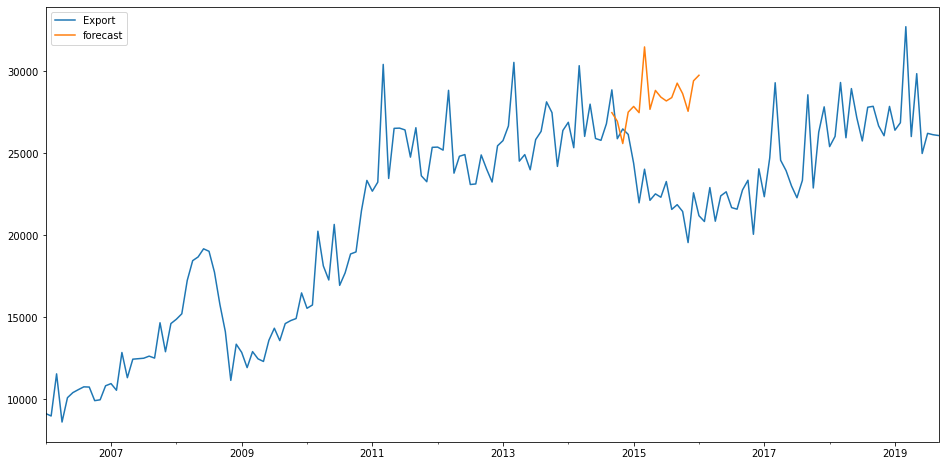

In [51]:
future_df['forecast']=results.predict(start=104, end=120, dynamic=True)
future_df[['Export', 'forecast']].plot(figsize=(16,8))

In [0]:
#forecasting for next 3 months 

In [0]:
from pandas.tseries.offsets import DateOffset

In [0]:
future_date=[df.index[-1]+DateOffset(months=x) for x in range(0,3)]

In [0]:
future_dates_df=pd.DataFrame(index=future_date[1:], columns=df.columns)

In [56]:
future_dates_df.tail()

,Import,Export,Export First Difference,Seasonal First Difference,forecast
2019-10-01,NaN,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN,NaN


In [0]:
future_df=pd.concat([df,future_dates_df])


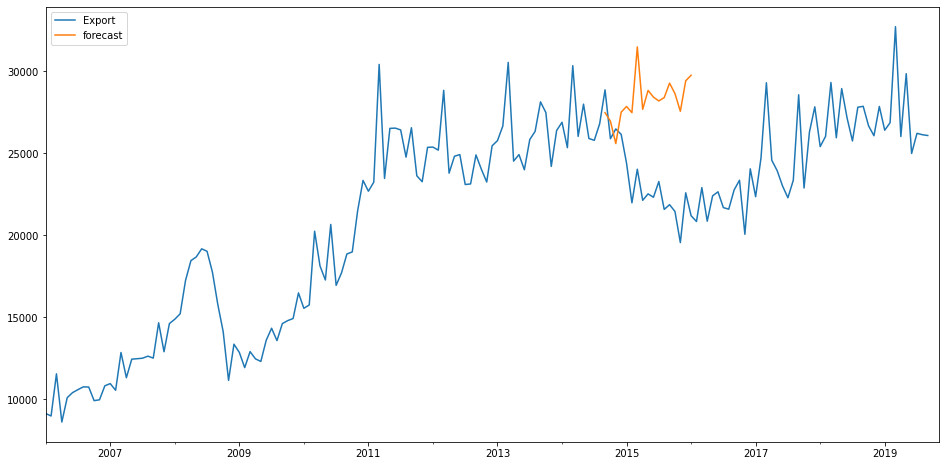

In [62]:
future_df['forecast']=results.predict(start=104, end=120, dynamic=True)
future_df[['Export','forecast']].plot(figsize=(16,8))

In [0]:
#-------------------------------------------------------------------------------------------THE END-------------------------------------------------------------------------------------------------------